# **This is the Jupyter / Google Collab notebook for the RandomForest part of the 10-605 Project Fall 2020 by the Team Zihao Ding, Varun Rawal, Sharan Sheshadri**

# CIFAR-10 PRELIMINARY-TEST

In [8]:
#@title Data-Fetch modules for CIFAR-10

########################################################################
#
# Functions for downloading the CIFAR-10 data-set from the internet
# and loading it into memory.
#
# Implemented in Python 3.5
#
# Usage:
# 1) Set the variable data_path with the desired storage path.
# 2) Call maybe_download_and_extract() to download the data-set
#    if it is not already located in the given data_path.
# 3) Call load_class_names() to get an array of the class-names.
# 4) Call load_training_data() and load_test_data() to get
#    the images, class-numbers and one-hot encoded class-labels
#    for the training-set and test-set.
# 5) Use the returned data in your own program.
#
# Format:
# The images for the training- and test-sets are returned as 4-dim numpy
# arrays each with the shape: [image_number, height, width, channel]
# where the individual pixels are floats between 0.0 and 1.0.
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import numpy as np
import pickle
import os

########################################################################

# Directory where you want to download and save the data-set.
# Set this before you start calling any of the functions below.
data_path = "data/CIFAR-100/"

# URL for the data-set on the internet.
data_url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"

########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 100

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 50000

# Number of images for each batch-file in the training-set.
_images_per_file = 1

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.

    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path, "cifar-100-python/", filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.

    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file,  encoding='latin1')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data['data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls_fine = np.array(data['fine_labels'])
    cls_coarse = np.array(data['coarse_labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls_fine, cls_coarse


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def maybe_download_and_extract():
    """
    Download and extract the CIFAR-10 data-set if it doesn't already exist
    in data_path (set this variable first to the desired path).
    """

    download.maybe_download_and_extract(url=data_url, download_dir=data_path)


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.

    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw_1 = _unpickle(filename="meta")['fine_label_names']
    raw_2 = _unpickle(filename="meta")['coarse_label_names']

    # Convert from binary strings.
    return raw_1, raw_2


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.

    The data-set is split into 5 data-files which are merged here.

    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls_fine = np.zeros(shape=[_num_images_train], dtype=int)
    cls_coarse = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    #for i in range(_num_files_train):
    # Load the images and class-numbers from the data-file.
    images_batch, cls_batch_fine, cls_batch_coarse = _load_data(filename="train")

    # Number of images in this batch.
    num_images = len(images_batch)

    # End-index for the current batch.
    end = begin + num_images

    # Store the images into the array.
    images[begin:end, :] = images_batch

    # Store the class-numbers into the array.
    cls_fine[begin:end] = cls_batch_fine
    cls_coarse[begin:end] = cls_batch_coarse 

    # The begin-index for the next batch is the current end-index.
    begin = end

    return images, cls_fine, cls_coarse, one_hot_encoded(class_numbers=cls_fine, num_classes=num_classes)


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.

    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls_fine, cls_coarse = _load_data(filename="test")

    return images, cls_fine, cls_coarse, one_hot_encoded(class_numbers=cls_fine, num_classes=num_classes)

########################################################################

########################################################################
#
# Cache-wrapper for a function or class.
#
# Save the result of calling a function or creating an object-instance
# to harddisk. This is used to persist the data so it can be reloaded
# very quickly and easily.
#
# Implemented in Python 3.5
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import os
import pickle
import numpy as np

########################################################################


def cache(cache_path, fn, *args, **kwargs):
    """
    Cache-wrapper for a function or class. If the cache-file exists
    then the data is reloaded and returned, otherwise the function
    is called and the result is saved to cache. The fn-argument can
    also be a class instead, in which case an object-instance is
    created and saved to the cache-file.

    :param cache_path:
        File-path for the cache-file.

    :param fn:
        Function or class to be called.

    :param args:
        Arguments to the function or class-init.

    :param kwargs:
        Keyword arguments to the function or class-init.

    :return:
        The result of calling the function or creating the object-instance.
    """

    # If the cache-file exists.
    if os.path.exists(cache_path):
        # Load the cached data from the file.
        with open(cache_path, mode='rb') as file:
            obj = pickle.load(file)

        print("- Data loaded from cache-file: " + cache_path)
    else:
        # The cache-file does not exist.

        # Call the function / class-init with the supplied arguments.
        obj = fn(*args, **kwargs)

        # Save the data to a cache-file.
        with open(cache_path, mode='wb') as file:
            pickle.dump(obj, file)

        print("- Data saved to cache-file: " + cache_path)

    return obj


########################################################################


def convert_numpy2pickle(in_path, out_path):
    """
    Convert a numpy-file to pickle-file.

    The first version of the cache-function used numpy for saving the data.
    Instead of re-calculating all the data, you can just convert the
    cache-file using this function.

    :param in_path:
        Input file in numpy-format written using numpy.save().

    :param out_path:
        Output file written as a pickle-file.

    :return:
        Nothing.
    """

    # Load the data using numpy.
    data = np.load(in_path)

    # Save the data using pickle.
    with open(out_path, mode='wb') as file:
        pickle.dump(data, file)


########################################################################

if __name__ == '__main__':
    # This is a short example of using a cache-file.

    # This is the function that will only get called if the result
    # is not already saved in the cache-file. This would normally
    # be a function that takes a long time to compute, or if you
    # need persistent data for some other reason.
    def expensive_function(a, b):
        return a * b

    print('Computing expensive_function() ...')

    # Either load the result from a cache-file if it already exists,
    # otherwise calculate expensive_function(a=123, b=456) and
    # save the result to the cache-file for next time.
    result = cache(cache_path='cache_expensive_function.pkl',
                   fn=expensive_function, a=123, b=456)

    print('result =', result)

    # Newline.
    print()

    # This is another example which saves an object to a cache-file.

    # We want to cache an object-instance of this class.
    # The motivation is to do an expensive computation only once,
    # or if we need to persist the data for some other reason.
    class ExpensiveClass:
        def __init__(self, c, d):
            self.c = c
            self.d = d
            self.result = c * d

        def print_result(self):
            print('c =', self.c)
            print('d =', self.d)
            print('result = c * d =', self.result)

    print('Creating object from ExpensiveClass() ...')

    # Either load the object from a cache-file if it already exists,
    # otherwise make an object-instance ExpensiveClass(c=123, d=456)
    # and save the object to the cache-file for the next time.
    obj = cache(cache_path='cache_ExpensiveClass.pkl',
                fn=ExpensiveClass, c=123, d=456)

    obj.print_result()

########################################################################

########################################################################
#
# Class for creating a data-set consisting of all files in a directory.
#
# Example usage is shown in the file knifey.py and Tutorial #09.
#
# Implemented in Python 3.5
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import numpy as np
import os

########################################################################


def one_hot_encoded(class_numbers, num_classes=None):
    """
    Generate the One-Hot encoded class-labels from an array of integers.

    For example, if class_number=2 and num_classes=4 then
    the one-hot encoded label is the float array: [0. 0. 1. 0.]

    :param class_numbers:
        Array of integers with class-numbers.
        Assume the integers are from zero to num_classes-1 inclusive.

    :param num_classes:
        Number of classes. If None then use max(class_numbers)+1.

    :return:
        2-dim array of shape: [len(class_numbers), num_classes]
    """

    # Find the number of classes if None is provided.
    # Assumes the lowest class-number is zero.
    if num_classes is None:
        num_classes = np.max(class_numbers) + 1

    return np.eye(num_classes, dtype=float)[class_numbers]


########################################################################


class DataSet:
    def __init__(self, in_dir, exts='.jpg'):
        """
        Create a data-set consisting of the filenames in the given directory
        and sub-dirs that match the given filename-extensions.

        For example, the knifey-spoony data-set (see knifey.py) has the
        following dir-structure:

        knifey-spoony/forky/
        knifey-spoony/knifey/
        knifey-spoony/spoony/
        knifey-spoony/forky/test/
        knifey-spoony/knifey/test/
        knifey-spoony/spoony/test/

        This means there are 3 classes called: forky, knifey, and spoony.

        If we set in_dir = "knifey-spoony/" and create a new DataSet-object
        then it will scan through these directories and create a training-set
        and test-set for each of these classes.

        The training-set will contain a list of all the *.jpg filenames
        in the following directories:

        knifey-spoony/forky/
        knifey-spoony/knifey/
        knifey-spoony/spoony/

        The test-set will contain a list of all the *.jpg filenames
        in the following directories:

        knifey-spoony/forky/test/
        knifey-spoony/knifey/test/
        knifey-spoony/spoony/test/

        See the TensorFlow Tutorial #09 for a usage example.

        :param in_dir:
            Root-dir for the files in the data-set.
            This would be 'knifey-spoony/' in the example above.

        :param exts:
            String or tuple of strings with valid filename-extensions.
            Not case-sensitive.

        :return:
            Object instance.
        """

        # Extend the input directory to the full path.
        in_dir = os.path.abspath(in_dir)

        # Input directory.
        self.in_dir = in_dir

        # Convert all file-extensions to lower-case.
        self.exts = tuple(ext.lower() for ext in exts)

        # Names for the classes.
        self.class_names = []

        # Filenames for all the files in the training-set.
        self.filenames = []

        # Filenames for all the files in the test-set.
        self.filenames_test = []

        # Class-number for each file in the training-set.
        self.class_numbers = []

        # Class-number for each file in the test-set.
        self.class_numbers_test = []

        # Total number of classes in the data-set.
        self.num_classes = 0

        # For all files/dirs in the input directory.
        for name in os.listdir(in_dir):
            # Full path for the file / dir.
            current_dir = os.path.join(in_dir, name)

            # If it is a directory.
            if os.path.isdir(current_dir):
                # Add the dir-name to the list of class-names.
                self.class_names.append(name)

                # Training-set.

                # Get all the valid filenames in the dir (not sub-dirs).
                filenames = self._get_filenames(current_dir)

                # Append them to the list of all filenames for the training-set.
                self.filenames.extend(filenames)

                # The class-number for this class.
                class_number = self.num_classes

                # Create an array of class-numbers.
                class_numbers = [class_number] * len(filenames)

                # Append them to the list of all class-numbers for the training-set.
                self.class_numbers.extend(class_numbers)

                # Test-set.

                # Get all the valid filenames in the sub-dir named 'test'.
                filenames_test = self._get_filenames(os.path.join(current_dir, 'test'))

                # Append them to the list of all filenames for the test-set.
                self.filenames_test.extend(filenames_test)

                # Create an array of class-numbers.
                class_numbers = [class_number] * len(filenames_test)

                # Append them to the list of all class-numbers for the test-set.
                self.class_numbers_test.extend(class_numbers)

                # Increase the total number of classes in the data-set.
                self.num_classes += 1

    def _get_filenames(self, dir):
        """
        Create and return a list of filenames with matching extensions in the given directory.

        :param dir:
            Directory to scan for files. Sub-dirs are not scanned.

        :return:
            List of filenames. Only filenames. Does not include the directory.
        """

        # Initialize empty list.
        filenames = []

        # If the directory exists.
        if os.path.exists(dir):
            # Get all the filenames with matching extensions.
            for filename in os.listdir(dir):
                if filename.lower().endswith(self.exts):
                    filenames.append(filename)

        return filenames

    def get_paths(self, test=False):
        """
        Get the full paths for the files in the data-set.

        :param test:
            Boolean. Return the paths for the test-set (True) or training-set (False).

        :return:
            Iterator with strings for the path-names.
        """

        if test:
            # Use the filenames and class-numbers for the test-set.
            filenames = self.filenames_test
            class_numbers = self.class_numbers_test

            # Sub-dir for test-set.
            test_dir = "test/"
        else:
            # Use the filenames and class-numbers for the training-set.
            filenames = self.filenames
            class_numbers = self.class_numbers

            # Don't use a sub-dir for test-set.
            test_dir = ""

        for filename, cls in zip(filenames, class_numbers):
            # Full path-name for the file.
            path = os.path.join(self.in_dir, self.class_names[cls], test_dir, filename)

            yield path

    def get_training_set(self):
        """
        Return the list of paths for the files in the training-set,
        and the list of class-numbers as integers,
        and the class-numbers as one-hot encoded arrays.
        """

        return list(self.get_paths()), \
               np.asarray(self.class_numbers), \
               one_hot_encoded(class_numbers=self.class_numbers,
                               num_classes=self.num_classes)

    def get_test_set(self):
        """
        Return the list of paths for the files in the test-set,
        and the list of class-numbers as integers,
        and the class-numbers as one-hot encoded arrays.
        """

        return list(self.get_paths(test=True)), \
               np.asarray(self.class_numbers_test), \
               one_hot_encoded(class_numbers=self.class_numbers_test,
                               num_classes=self.num_classes)


########################################################################


def load_cached(cache_path, in_dir):
    """
    Wrapper-function for creating a DataSet-object, which will be
    loaded from a cache-file if it already exists, otherwise a new
    object will be created and saved to the cache-file.

    This is useful if you need to ensure the ordering of the
    filenames is consistent every time you load the data-set,
    for example if you use the DataSet-object in combination
    with Transfer Values saved to another cache-file, see e.g.
    Tutorial #09 for an example of this.

    :param cache_path:
        File-path for the cache-file.

    :param in_dir:
        Root-dir for the files in the data-set.
        This is an argument for the DataSet-init function.

    :return:
        The DataSet-object.
    """

    print("Creating dataset from the files in: " + in_dir)

    # If the object-instance for DataSet(in_dir=data_dir) already
    # exists in the cache-file then reload it, otherwise create
    # an object instance and save it to the cache-file for next time.
    dataset = cache(cache_path=cache_path,
                    fn=DataSet, in_dir=in_dir)

    return dataset


########################################################################

########################################################################
#
# Functions for downloading and extracting data-files from the internet.
#
# Implemented in Python 3.5
#
########################################################################
#
# This file is part of the TensorFlow Tutorials available at:
#
# https://github.com/Hvass-Labs/TensorFlow-Tutorials
#
# Published under the MIT License. See the file LICENSE for details.
#
# Copyright 2016 by Magnus Erik Hvass Pedersen
#
########################################################################

import sys
import os
import urllib.request
import tarfile
import zipfile

########################################################################


def _print_download_progress(count, block_size, total_size):
    """
    Function used for printing the download progress.
    Used as a call-back function in maybe_download_and_extract().
    """

    # Percentage completion.
    pct_complete = float(count * block_size) / total_size

    # Status-message. Note the \r which means the line should overwrite itself.
    msg = "\r- Download progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()


########################################################################


def maybe_download_and_extract(url, download_dir):
    """
    Download and extract the data if it doesn't already exist.
    Assumes the url is a tar-ball file.

    :param url:
        Internet URL for the tar-file to download.
        Example: "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

    :param download_dir:
        Directory where the downloaded file is saved.
        Example: "data/CIFAR-10/"

    :return:
        Nothing.
    """

    # Filename for saving the file downloaded from the internet.
    # Use the filename from the URL and add it to the download_dir.
    filename = url.split('/')[-1]
    file_path = os.path.join(download_dir, filename)

    # Check if the file already exists.
    # If it exists then we assume it has also been extracted,
    # otherwise we need to download and extract it now.
    if not os.path.exists(file_path):
        # Check if the download directory exists, otherwise create it.
        if not os.path.exists(download_dir):
            os.makedirs(download_dir)

        # Download the file from the internet.
        file_path, _ = urllib.request.urlretrieve(url=url,
                                                  filename=file_path,
                                                  reporthook=_print_download_progress)

        print()
        print("Download finished. Extracting files.")

        if file_path.endswith(".zip"):
            # Unpack the zip-file.
            zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
        elif file_path.endswith((".tar.gz", ".tgz")):
            # Unpack the tar-ball.
            tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)

        print("Done.")
    else:
        print("Data has apparently already been downloaded and unpacked.")


########################################################################




Computing expensive_function() ...
- Data loaded from cache-file: cache_expensive_function.pkl
result = 56088

Creating object from ExpensiveClass() ...
- Data loaded from cache-file: cache_ExpensiveClass.pkl
c = 123
d = 456
result = c * d = 56088


In [3]:

import matplotlib.pyplot as plt


In [4]:

data_path = "data/CIFAR-100/"
maybe_download_and_extract(url=data_url, download_dir=data_path)

Data has apparently already been downloaded and unpacked.


In [5]:
class_names_fine, class_names_coarse = load_class_names()

class_names_fine, class_names_coarse



Loading data: data/CIFAR-100/cifar-100-python/meta
Loading data: data/CIFAR-100/cifar-100-python/meta


(['apple',
  'aquarium_fish',
  'baby',
  'bear',
  'beaver',
  'bed',
  'bee',
  'beetle',
  'bicycle',
  'bottle',
  'bowl',
  'boy',
  'bridge',
  'bus',
  'butterfly',
  'camel',
  'can',
  'castle',
  'caterpillar',
  'cattle',
  'chair',
  'chimpanzee',
  'clock',
  'cloud',
  'cockroach',
  'couch',
  'crab',
  'crocodile',
  'cup',
  'dinosaur',
  'dolphin',
  'elephant',
  'flatfish',
  'forest',
  'fox',
  'girl',
  'hamster',
  'house',
  'kangaroo',
  'keyboard',
  'lamp',
  'lawn_mower',
  'leopard',
  'lion',
  'lizard',
  'lobster',
  'man',
  'maple_tree',
  'motorcycle',
  'mountain',
  'mouse',
  'mushroom',
  'oak_tree',
  'orange',
  'orchid',
  'otter',
  'palm_tree',
  'pear',
  'pickup_truck',
  'pine_tree',
  'plain',
  'plate',
  'poppy',
  'porcupine',
  'possum',
  'rabbit',
  'raccoon',
  'ray',
  'road',
  'rocket',
  'rose',
  'sea',
  'seal',
  'shark',
  'shrew',
  'skunk',
  'skyscraper',
  'snail',
  'snake',
  'spider',
  'squirrel',
  'streetcar',
  

In [12]:
images_train, cls_train_fine, cls_train_fine, labels_train = load_training_data()
images_test, cls_test_fine, cls_test_coarse, labels_test = load_test_data()

cls_train = cls_train_fine
cls_test = cls_test_fine

Loading data: data/CIFAR-100/cifar-100-python/train
Loading data: data/CIFAR-100/cifar-100-python/test


In [13]:
print("Size of:")
print("Training-set:\t\t{}".format(len(images_train)))
print("Test-set:\t\t{}".format(len(images_test)))

Size of:
Training-set:		50000
Test-set:		10000


In [18]:
np.unique(cls_test), cls_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([49, 33, 72, ..., 51, 42, 70]))

In [19]:
pixels_train = images_train.reshape(50000,3072)
pixels_test  = images_test.reshape(10000, 3072)

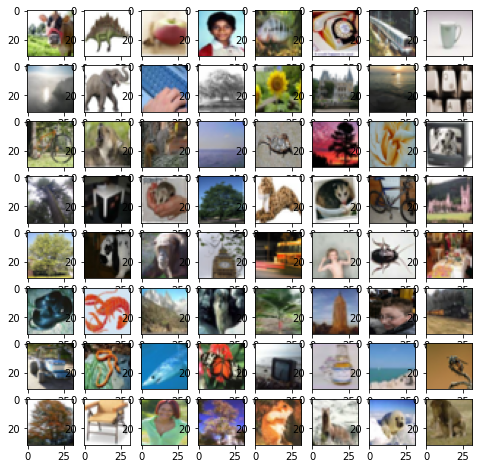

In [20]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i])
plt.show()

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Please change classifiers parameters below appropriately, 

# many of them may have been set to  dummy values, e.g. n_estimators = 1

In [28]:
clf = RandomForestClassifier(n_jobs=1,n_estimators=100)

In [23]:
# x_train, x_test, y_train, y_test = train_test_split(pixels, cls_train, test_size=0.25, random_state = 0)
x_train, x_test, y_train, y_test = pixels_train, pixels_test, cls_train, cls_test

In [29]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
clf.score(x_test, y_test)

0.0115

In [26]:
y_pred = clf.predict(x_test)
y_pred, y_test

(array([16,  3,  7, ..., 12, 12, 19]), array([49, 33, 72, ..., 51, 42, 70]))

In [27]:
np.savetxt('output.csv', y_pred)

# END OF CIFAR-100 PRELIMINARY-TEST

# NEXT : CIFAR-100 WORK 

# CIFAR 100 Image Classification 

 This dataset contains 100 different classes of image. Each classes contain 500 other images therefore we can say the data is properly organised.  All images are of `3 channels` of dimensions `32 x 32` . We will be applying different Random Forest classifier approaches to get the best outputs from this dataset. 
 
 I would like to mention [This site](https://www.kaggle.com/minbavel/cifar-100-images) from where I took the dataset on which I will be working on .

In [6]:
!pip install opendatasets --upgrade -q
!pip install jovian --upgrade -q

In [7]:
#@title Import modules for pytorch code
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import os
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import torchvision.models as models
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline

In [8]:
kaggle_api = {"username":"varunrawal","key":"16c2afe690b4b18e912ad53dc7424900"}

In [9]:
dataset_url = 'https://www.kaggle.com/minbavel/cifar-100-images'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: varunrawal
Your Kaggle Key: ··········


 19%|█▊        | 26.0M/140M [00:00<00:00, 268MB/s]

100%|██████████| 140M/140M [00:00<00:00, 284MB/s]


## Preparing the Data

Let's begin by downloading the dataset and creating PyTorch datasets to load the data.

Here in my Project I will be using dataset that is already present in Kaggle data section. 
I am using CIFAR 100 dataset from https://www.kaggle.com/minbavel/cifar-100-images

In [11]:
project_name="Cifar-100"

# I dowloaded the dataset using OpenDataset Library and by entering my Kaggle Key and Kaggle Username
# Let's look into the data directory
data_dir = './cifar-100-images/CIFAR100'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/TRAIN")
print(classes[:10])
print(len(classes))

['TRAIN', 'TEST']
['spider', 'hamster', 'plate', 'boy', 'wardrobe', 'cockroach', 'porcupine', 'beaver', 'beetle', 'train']
100


In [12]:
# Let's evaluate a single class say "man"
man_file=os.listdir(data_dir+"/TRAIN/man")
print("NO. of Training examples for Man:",len(man_file))
print(man_file[:5])

NO. of Training examples for Man: 500
['adam_s_001223.png', 'cain_s_001438.png', 'man_s_001949.png', 'adam_s_001396.png', 'man_s_000723.png']


In [13]:
# Let's see how many number of files/images are present in each classes
di={}
for i in classes:
    di[i]=len(os.listdir(data_dir+"/TRAIN/"+i))
print(di)

{'spider': 500, 'hamster': 500, 'plate': 500, 'boy': 500, 'wardrobe': 500, 'cockroach': 500, 'porcupine': 500, 'beaver': 500, 'beetle': 500, 'train': 500, 'couch': 500, 'motorcycle': 500, 'clock': 500, 'palm_tree': 500, 'apple': 500, 'tractor': 500, 'tank': 500, 'orchid': 500, 'trout': 500, 'bear': 500, 'man': 500, 'kangaroo': 500, 'pine_tree': 500, 'whale': 500, 'skyscraper': 500, 'lamp': 500, 'turtle': 500, 'willow_tree': 500, 'can': 500, 'dinosaur': 500, 'shark': 500, 'snail': 500, 'sweet_pepper': 500, 'raccoon': 500, 'maple_tree': 500, 'mountain': 500, 'wolf': 500, 'skunk': 500, 'sea': 500, 'cloud': 500, 'fox': 500, 'bicycle': 500, 'dolphin': 500, 'possum': 500, 'keyboard': 500, 'bridge': 500, 'bottle': 500, 'ray': 500, 'cup': 500, 'chair': 500, 'orange': 500, 'plain': 500, 'crab': 500, 'poppy': 500, 'seal': 500, 'aquarium_fish': 500, 'caterpillar': 500, 'bowl': 500, 'worm': 500, 'bee': 500, 'mushroom': 500, 'sunflower': 500, 'rabbit': 500, 'tiger': 500, 'elephant': 500, 'camel': 5

# Training the Dataset 

In [14]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4,padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)
                        ])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
# PyTorch datasets
train_ds = ImageFolder(data_dir+'/TRAIN', train_tfms)
valid_ds = ImageFolder(data_dir+'/TEST', valid_tfms)

# PyTorch data loaders
train_dl = DataLoader(train_ds, len(train_ds), shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, len(valid_ds), num_workers=3, pin_memory=True)

In [15]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images[:64], nrow=8).permute(1, 2, 0))
        break
        

Using a GPU
To seamlessly use a GPU, if one is available, we define a couple of helper functions (get_default_device & to_device) and a helper class DeviceDataLoader to move our model & data to the GPU as required.

In [16]:
#@title Device Data loader modules for pytorch code

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [17]:
device = get_default_device()
print("device : ", device)

# Transfering data to the device in use (In our case GPU)
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

device :  cuda


In [18]:
def predicts(self, vectors):

  n = vectors.shape[0]
  predictions = np.zeros((n,))

  for i in range(n):
      vector = vectors[i, :].reshape(1, -1)
      #print(vector.shape)
      predictions[i] = self.predict(vector)

  return predictions

def accuracy(outputs, labels):
    #_, preds = torch.max(outputs, dim=1)
    preds = outputs
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def training_step(self, batch):
    images, labels = batch 
    images = images.reshape(images.shape[0], -1)
    #print(images.shape)
    self.fit(images, labels)
    out = predicts(self, images)          # Generate predictions
    loss = F.mse_loss(out, labels) # Calculate loss
    acc = accuracy(out, labels) # Calculate loss
    print("Accuracy : ", 100.0*acc.item(), " Loss : ", loss.item())
    return loss, acc

def validation_step(self, batch):
    images, labels = batch 
    out = predicts(self, images)            # Generate predictions
    #print("@@@ : ", out.shape, labels.shape)
    loss = F.mse_loss(out, labels)   # Calculate loss
    acc = accuracy(out, labels)           # Calculate accuracy
    return {'val_loss': loss.detach(), 'val_acc': acc}
    
def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

def epoch_end(self, epoch, result):
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
        epoch, result['train_loss'], result['val_loss'], result['val_acc']))

# load setup.py and requirements.txt from https://github.com/ValentinFigue/Sklearn_PyTorch

In [19]:
from google.colab import drive
auth_code = "4/1AY0e-g77YU5GrrEIuY9pKKvhkbcBy4mGHQn5RiiuubgH3jtfBcUCh_gf4M4"
drive.mount('/content/drive/')
#drive.mount('/content/drive/MyDrive/Sklearn_PyTorch-master')
%cd /content/drive/MyDrive/Sklearn_PyTorch-master/

%run -i /content/drive/MyDrive/Sklearn_PyTorch-master/setup.py install
import sys
!{sys.executable} -m pip install -r requirements.txt



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Sklearn_PyTorch-master
running install
running bdist_egg
running egg_info
writing Sklearn_PyTorch.egg-info/PKG-INFO
writing dependency_links to Sklearn_PyTorch.egg-info/dependency_links.txt
writing requirements to Sklearn_PyTorch.egg-info/requires.txt
writing top-level names to Sklearn_PyTorch.egg-info/top_level.txt
reading manifest file 'Sklearn_PyTorch.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'Sklearn_PyTorch.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/decision_node.py -> build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/utils.py -> build/bdist.linux-x86_64/egg/Sklearn

zip_safe flag not set; analyzing archive contents...


creating 'dist/Sklearn_PyTorch-0.1.0-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing Sklearn_PyTorch-0.1.0-py3.6.egg
Removing /usr/local/lib/python3.6/dist-packages/Sklearn_PyTorch-0.1.0-py3.6.egg
Copying Sklearn_PyTorch-0.1.0-py3.6.egg to /usr/local/lib/python3.6/dist-packages
Sklearn-PyTorch 0.1.0 is already the active version in easy-install.pth

Installed /usr/local/lib/python3.6/dist-packages/Sklearn_PyTorch-0.1.0-py3.6.egg
Processing dependencies for Sklearn-PyTorch==0.1.0
Searching for numpy==1.18.5
Best match: numpy 1.18.5
Adding numpy 1.18.5 to easy-install.pth file
Installing f2py script to /usr/local/bin
Installing f2py3 script to /usr/local/bin
Installing f2py3.6 script to /usr/local/bin

Using /usr/local/lib/python3.6/dist-packages
Searching for torchvision==0.8.1+cu101
Best match: torchvision 0.8.1+cu101
Adding torchvision 0.8.1+cu101 to easy-install.pth file

Using /usr/local/lib/pyth

In [20]:

%cd ./
%pwd

/content/drive/MyDrive/Sklearn_PyTorch-master


'/content/drive/My Drive/Sklearn_PyTorch-master'

In [21]:
# verify if sklearn pytorch library impported
import Sklearn_PyTorch

In [22]:
%run -i setup.py install

running install
running bdist_egg
running egg_info
writing Sklearn_PyTorch.egg-info/PKG-INFO
writing dependency_links to Sklearn_PyTorch.egg-info/dependency_links.txt
writing requirements to Sklearn_PyTorch.egg-info/requires.txt
writing top-level names to Sklearn_PyTorch.egg-info/top_level.txt
reading manifest file 'Sklearn_PyTorch.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'Sklearn_PyTorch.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/decision_node.py -> build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/utils.py -> build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/binary_tree.py -> build/bdist.linux-x86_64/egg/Sklearn_PyTorch
copying build/lib/Sklearn_PyTorch/random_forest.py -> build/bdist.linux

zip_safe flag not set; analyzing archive contents...


creating 'dist/Sklearn_PyTorch-0.1.0-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing Sklearn_PyTorch-0.1.0-py3.6.egg
Removing /usr/local/lib/python3.6/dist-packages/Sklearn_PyTorch-0.1.0-py3.6.egg
Copying Sklearn_PyTorch-0.1.0-py3.6.egg to /usr/local/lib/python3.6/dist-packages
Sklearn-PyTorch 0.1.0 is already the active version in easy-install.pth

Installed /usr/local/lib/python3.6/dist-packages/Sklearn_PyTorch-0.1.0-py3.6.egg
Processing dependencies for Sklearn-PyTorch==0.1.0
Searching for numpy==1.18.5
Best match: numpy 1.18.5
Adding numpy 1.18.5 to easy-install.pth file
Installing f2py script to /usr/local/bin
Installing f2py3 script to /usr/local/bin
Installing f2py3.6 script to /usr/local/bin

Using /usr/local/lib/python3.6/dist-packages
Searching for torchvision==0.8.1+cu101
Best match: torchvision 0.8.1+cu101
Adding torchvision 0.8.1+cu101 to easy-install.pth file

Using /usr/local/lib/pyth

In [23]:



# Import of the model
from Sklearn_PyTorch import TorchRandomForestClassifier

# Initialisation of the model
my_RF_model = TorchRandomForestClassifier(nb_trees=1000, nb_samples=30, max_depth=5, bootstrap=True)

# Definition of the input data
import torch
my_data = torch.FloatTensor([[0,1,2.4],[1,2,1],[4,2,0.2],[8,3,0.4], [4,1,0.4]])
my_label = torch.LongTensor([0,1,0,0,1])

print(my_data.shape, my_label.shape)

# Fitting function
my_RF_model.fit(my_data, my_label)

# Prediction function
my_vector = torch.FloatTensor([[1,2,1.4], [3,3,3]])
my_result = predicts(my_RF_model, my_vector)
my_result

torch.Size([5, 3]) torch.Size([5])


ValueError: ignored

In [ ]:
my_RF_model = TorchRandomForestClassifier(nb_trees=1000, nb_samples=30, max_depth=5, bootstrap=True)

# Train the Model

In [27]:
@torch.no_grad()
def evaluate(model, val_loader):
    #model.eval()
    outputs = [validation_step(model, batch) for batch in val_loader]
    return validation_epoch_end(model, outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(n_estimators, epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # # Set up cutom optimizer with weight decay
    # optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # # Set up one-cycle learning rate scheduler
    # sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
    #                                             steps_per_epoch=len(train_loader))
    epochs = 1
    for epoch in range(epochs):
        # Training Phase 
        #model.train()
        train_losses = []
        train_acc = []

        lrs = []
        for batch in train_loader:
            loss, acc = training_step(model,batch)
            train_losses.append(loss)
            train_acc.append(acc)
            # loss.backward()
            
            # Gradient clipping
            # if grad_clip: 
            #     nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            # optimizer.step()
            # optimizer.zero_grad()
            
            # Record & update learning rate
            #lrs.append(get_lr(optimizer))
            #sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_acc'] = torch.stack(train_acc).mean().item()
        #result['lrs'] = lrs
        epoch_end(model, epoch, result)
        result['n_estimators'] = n_estimators
        history.append(result)
    return history

In [28]:
%cd /content/

batches = [batch for batch in  valid_dl]
imgs, lbls = batches[0]
imgs.shape

/content


torch.Size([10000, 3, 32, 32])

In [29]:
history = [evaluate(my_RF_model, valid_dl)]
history

NotFittedError: ignored

# Set the hyper-parameters

In [ ]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay =1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

#model = my_RF_model
history = []
#for n_estimators in [1, 10, 50, 100, 200, 500, 1000, 5000]:
for n_estimators in [1, 10, 50]:
  #my_RF_model = TorchRandomForestClassifier(nb_trees = n_estimators, nb_samples=30, max_depth=max(5, n_estimators), bootstrap=True)
  my_RF_model = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', max_depth= max(50, n_estimators/10), min_samples_split=30, n_jobs = None)
  history += fit_one_cycle(n_estimators, epochs, max_lr, my_RF_model, train_dl, valid_dl, 
                              grad_clip=grad_clip, 
                              weight_decay=weight_decay, 
                              opt_func=opt_func)

In [26]:
# Plotted the accuracy Graph
def plot_accuracies(history):
    accuracies = [100.0*x['val_acc'] for x in history]
    n_ests = [x['n_estimators'] for x in history]

    plt.plot(n_ests, accuracies, '-x')
    plt.xlabel('n_trees')
    plt.ylabel('accuracy %')
    plt.title('Accuracy vs. No. of Trees');

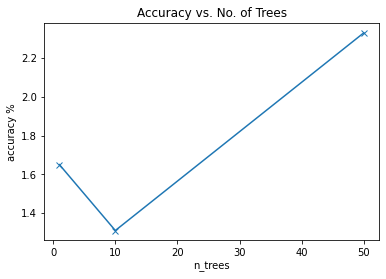

In [251]:
plot_accuracies(history)

In [252]:
# Training and Validation loss graph
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]

    n_ests = [x['n_estimators'] for x in history]

    plt.plot(n_ests, train_losses, '-bx')
    plt.plot(n_ests, val_losses, '-rx')
    
    plt.xlabel('epoch')
    plt.ylabel('loss')

    plt.legend(['Training', 'Validation'])

    plt.title('Loss vs. No. of Trees');

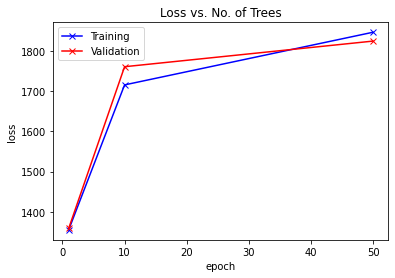

In [253]:
plot_losses(history)

# **Prediction and testing of MODEL**

In [ ]:
from torchvision.transforms import ToTensor
test_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)
                        ])
test_dataset = ImageFolder(data_dir+'/TEST', test_tfms)
dataset = ImageFolder(data_dir+'/TRAIN', transform=ToTensor())

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bed , Predicted: bed


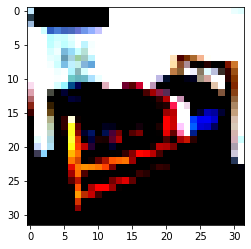

In [ ]:

img, label = test_dataset[550]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: apple , Predicted: apple


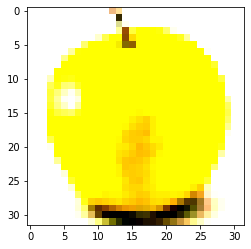

In [ ]:
img, label = test_dataset[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: aquarium_fish , Predicted: aquarium_fish


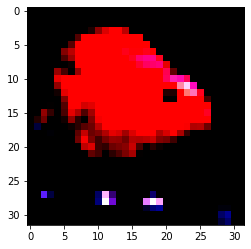

In [ ]:

img, label = test_dataset[117]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: baby , Predicted: baby


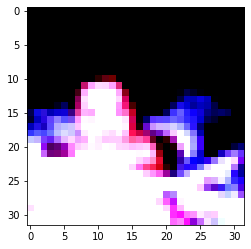

In [ ]:

img, label = test_dataset[210]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: bed , Predicted: streetcar


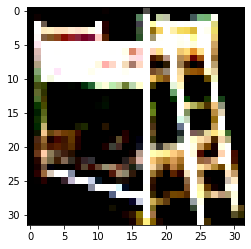

In [ ]:
img, label = test_dataset[589]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.7301923036575317, 'val_loss': 1.0213992595672607}

## Save and Commit

Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. As you try different ideas, make sure to record every experiment so you can look back and analyze the results.

In [ ]:
torch.save(model.state_dict(), 'cifar100-resnet12layers.pth')
model2 = to_device(ResNet152(3, 100), device)
model2.load_state_dict(torch.load('cifar100-resnet12layers.pth'))
evaluate(model2, test_loader)

{'val_acc': 0.7301923036575317, 'val_loss': 1.0213992595672607}

# Autoencoder (MNIST) + Scikit-Learn Random Forest Classifier

- Runs on CPU or GPU (if available)

A simple, single-hidden-layer, fully-connected autoencoder that compresses 768-pixel MNIST images into 32-pixel vectors (32-times smaller representations). A random forest classifier is then trained for predicting the class labels based on that 32-pixel compressed space.

## Imports

In [221]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True


##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)

# Hyperparameters
random_seed = 123
learning_rate = 0.005
num_epochs = 5
batch_size = 256

# Architecture
num_features = 784
num_hidden_1 = 32


##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=len(train_dataset), 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=len(test_dataset), 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Device: cuda:0
Image batch dimensions: torch.Size([60000, 1, 28, 28])
Image label dimensions: torch.Size([60000])


## Model

In [5]:
##########################
### MODEL
##########################

class Autoencoder(torch.nn.Module):

    def __init__(self, num_features):
        super(Autoencoder, self).__init__()
        
        ### ENCODER
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        # The following to lones are not necessary, 
        # but used here to demonstrate how to access the weights
        # and use a different weight initialization.
        # By default, PyTorch uses Xavier/Glorot initialization, which
        # should usually be preferred.
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()
        
        ### DECODER
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_features)
        self.linear_1.weight.detach().normal_(0.0, 0.1)
        self.linear_1.bias.detach().zero_()
        
    def encoder(self, x):
        encoded = self.linear_1(x)
        encoded = F.leaky_relu(encoded)
        return encoded
    
    def decoder(self, encoded_x):
        logits = self.linear_2(encoded_x)
        decoded = torch.sigmoid(logits)
        return decoded
        

    def forward(self, x):
        
        ### ENCODER
        encoded = self.encoder(x)
        
        ### DECODER
        decoded = self.decoder(encoded)
        
        return decoded

    
torch.manual_seed(random_seed)
model = Autoencoder(num_features=num_features)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

## Training

In [6]:
start_time = time.time()
for epoch in range(num_epochs):
    for batch_idx, (features, targets) in enumerate(train_loader):
        
        # don't need labels, only the images (features)
        features = features.view(-1, 28*28).to(device)
            
        ### FORWARD AND BACK PROP
        decoded = model(features)
        cost = F.binary_cross_entropy(decoded, features)
        optimizer.zero_grad()
        
        cost.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Cost: %.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), cost))
            
    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/005 | Batch 000/235 | Cost: 0.7095
Epoch: 001/005 | Batch 050/235 | Cost: 0.2039
Epoch: 001/005 | Batch 100/235 | Cost: 0.1567
Epoch: 001/005 | Batch 150/235 | Cost: 0.1362
Epoch: 001/005 | Batch 200/235 | Cost: 0.1259
Time elapsed: 0.08 min
Epoch: 002/005 | Batch 000/235 | Cost: 0.1172
Epoch: 002/005 | Batch 050/235 | Cost: 0.1157
Epoch: 002/005 | Batch 100/235 | Cost: 0.1089
Epoch: 002/005 | Batch 150/235 | Cost: 0.1032
Epoch: 002/005 | Batch 200/235 | Cost: 0.0999
Time elapsed: 0.15 min
Epoch: 003/005 | Batch 000/235 | Cost: 0.1045
Epoch: 003/005 | Batch 050/235 | Cost: 0.0973
Epoch: 003/005 | Batch 100/235 | Cost: 0.0988
Epoch: 003/005 | Batch 150/235 | Cost: 0.0955
Epoch: 003/005 | Batch 200/235 | Cost: 0.0969
Time elapsed: 0.23 min
Epoch: 004/005 | Batch 000/235 | Cost: 0.0938
Epoch: 004/005 | Batch 050/235 | Cost: 0.0991
Epoch: 004/005 | Batch 100/235 | Cost: 0.0959
Epoch: 004/005 | Batch 150/235 | Cost: 0.0969
Epoch: 004/005 | Batch 200/235 | Cost: 0.0983
Time elapse

### Training Dataset

Image batch dimensions: torch.Size([15, 1, 28, 28])
Image label dimensions: torch.Size([15])


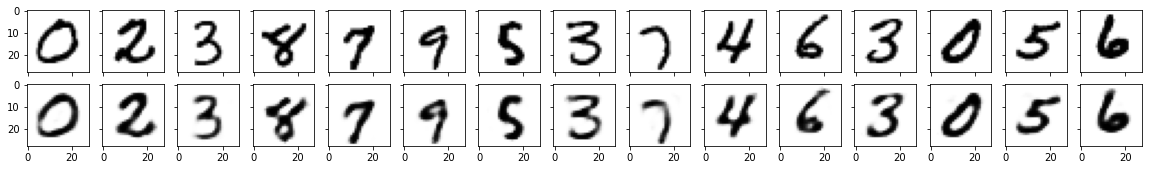

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=15, 
                          shuffle=True)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
# =============================================================

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')

Image batch dimensions: torch.Size([15, 1, 28, 28])
Image label dimensions: torch.Size([15])


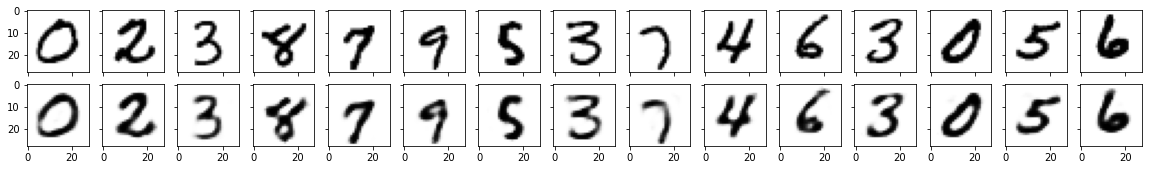

In [8]:
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=15, 
                         shuffle=True)

# Checking the dataset
for images, labels in test_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break
    
# =============================================================

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')

## Scikit-learn Classifier

### On Original MNIST

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=60000, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                          batch_size=10000, 
                          shuffle=False)

In [10]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

X_train = np.array(images.reshape(60000, 28*28))
y_train = np.array(labels)


for images, labels in test_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

X_test = np.array(images.reshape(10000, 28*28))
y_test = np.array(labels)

Image batch dimensions: torch.Size([60000, 1, 28, 28])
Image label dimensions: torch.Size([60000])
Image batch dimensions: torch.Size([10000, 1, 28, 28])
Image label dimensions: torch.Size([10000])


In [11]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(X_train, y_train)
print(f'Train Accuracy: {rf.score(X_train, y_train)*100}%')
print(f'Test Accuracy: {rf.score(X_test, y_test)*100}%')

Train Accuracy: 100.0%
Test Accuracy: 97.13000000000001%


### Using PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)  # same size as autoencoder latent space
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(X_train_pca, y_train)
print(f'Train Accuracy: {rf.score(X_train_pca, y_train)*100}%')
print(f'Test Accuracy: {rf.score(X_test_pca, y_test)*100}%')

### Compressed MNIST

In [13]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=1000, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                          batch_size=1000, 
                          shuffle=False)

In [14]:
X_train_compr = np.ones((60000, num_hidden_1))
y_train = np.ones(60000)

start_idx = 0

for idx, (images, labels) in enumerate(train_loader): 
    features = images.view(-1, 28*28).to(device)
    decoded = model.encoder(features)
    X_train_compr[start_idx:start_idx+1000] = decoded.to(torch.device('cpu')).detach().numpy()
    y_train[start_idx:start_idx+1000] = labels
    start_idx += 1000

In [15]:
X_test_compr = np.ones((10000, num_hidden_1))
y_test = np.ones(10000)

start_idx = 0

for idx, (images, labels) in enumerate(test_loader): 
    features = images.view(-1, 28*28).to(device)
    decoded = model.encoder(features)
    X_test_compr[start_idx:start_idx+1000] = decoded.to(torch.device('cpu')).detach().numpy()
    y_test[start_idx:start_idx+1000] = labels
    start_idx += 1000

In [16]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(X_train_compr, y_train)
print(f'Train Accuracy: {rf.score(X_train_compr, y_train)*100}%')
print(f'Test Accuracy: {rf.score(X_test_compr, y_test)*100}%')

Train Accuracy: 100.0%
Test Accuracy: 95.09%
